In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import scipy.signal as sig
import numpy as np
import pandas as pd
import os
import sys
#from IPython.core.debugger import set_trace
#plt.style.use(r"C:\Data\Python\Characterisation_Report_scripts\src\plot_style.mplstyle")
#plt.style.use(r"C:\Data\Python\Characterisation_Report_scripts\src\beamer_style.mplstyle")

C:\Python27\lib\site-packages\pandas\core\nanops.py:39: UserWarning: The installed version of bottleneck 0.8.0 is not supported in pandas and will be not be used
The minimum supported version is 1.0.0

  ver=ver, min_ver=_MIN_BOTTLENECK_VERSION), UserWarning)


In [2]:
sys.path.append(r'C:\Daten\Python\DGA_simulator\simulator\PLS2')
sys.path.append(r'C:\Daten\Python\DGA_simulator\simulator')
import statistics
import helper_functions as hf

C:\Daten\Python\DGA_simulator\simulator\PLS2\statistics.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "C:\Python27\lib\runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\Python27\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\Python27\lib\site-packages\IPython\kernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Python27\lib\site-packages\IPython\config\application.py", line 574, in launch_instance
    app.start()
  File "C:\Python27\lib\site-packages\IPython\kernel\zmq\kernelapp.py", line 373, in start
    ioloop.IOLoop.instance().start()
  File "C:\Python27\lib\site-packages\tornado\ioloop.py", line 837, in start
    handler_f

In [3]:
stats=statistics.Statistics()

mmap not loaded


# plot der allan varianzen

In [4]:
base_path = r"C:\Daten\Python\DGA_simulator\results\16_11_2018_new_setup"
path_pellicle_0ppm=os.path.join(base_path,"old_setup","concentrationen_mit_pellicel_beamsplitter_0ppm_CH4.pck")
path_pellicle_5ppm=os.path.join(base_path,"old_Setup","concentrationen_mit_pellicel_beamsplitter_4.97ppm_CH4.pck")
path_CaF2_0ppm=os.path.join(base_path,"old_setup","concentrationen_mit_CaF2_beamsplitter_0ppm_CH4.pck")
path_CaF2_5ppm=os.path.join(base_path,"old_Setup","concentrationen_mit_CaF2_beamsplitter_4.97ppm_CH4.pck")

In [5]:
import pickle

In [6]:
path_pellicle_0ppm

'C:\\Daten\\Python\\DGA_simulator\\results\\16_11_2018_new_setup\\old_setup\\concentrationen_mit_pellicel_beamsplitter_0ppm_CH4.pck'

In [7]:
stats.load_data(path_pellicle_5ppm)

In [8]:
stats.tuning_frequency

8.0

In [9]:
stats.start_plot()

<IPython.core.display.Javascript object>

In [10]:
stats.calc_taulist(stats.num_sets)
stats.calc_allan()        
stats.calc_mean()
stats.plot_allanplot(components=['Methane'])#,save_path=r"C:\Daten\Python\DGA_simulator\results\new_save_test.png")

0

In [52]:
stats.load_data(path_CaF2_5ppm)
stats.calc_taulist(stats.num_sets)
stats.calc_allan()        
stats.calc_mean()
stats.plot_allanplot(ax=[stats.ax,stats.ax2],components=['Methane'])

0

In [14]:
#minimum allan variance
min_allan_dev=np.sqrt(stats.allan_plot[0].min())
#integration time for minimum deviation
min_index=np.argmin(stats.allan_plot[0])
integration_time=stats.tauplotliste[min_index]
#minimum std dev of mean
min_std_mean=np.sqrt(stats.mean_variance[0].min())
#integration time for minimum deviation
min_index=np.argmin(stats.mean_variance[0])
integration_time_std=stats.tauplotliste_std[min_index]
print 'minimum allan deviation: {:f} ppm'.format(min_allan_dev)
print 'integration time: {:f} s'.format(integration_time/1000)
print 'detection limit, 95%: {:f} ppm'. format(2*1.65*min_allan_dev)
print 'minimum std. dev. of mean: {:f} ppm'.format(min_std_mean)
print 'integration time: {:f} s'.format(integration_time_std/1000)

minimum allan deviation: 0.028582 ppm
integration time: 256.000000 s
detection limit, 95%: 0.094321 ppm
minimum std. dev. of mean: 0.000421 ppm
integration time: 46506.000000 s


<IPython.core.display.Javascript object>


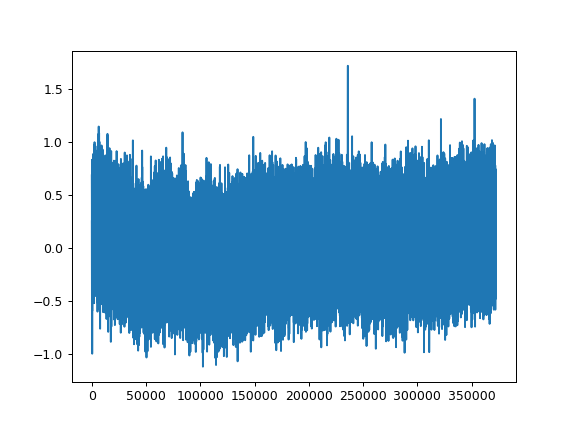

In [15]:
fig, ax = plt.subplots()
ax.plot(stats.data[0])